<a href="https://colab.research.google.com/github/sightes/RNA-UBO/blob/main/convolucional_char_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
np.random.seed(2)
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense
from tensorflow.keras.optimizers import SGD

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def graficar_matriz_de_confusion(y_ref, y_pred, clases, cmap=plt.cm.Blues):
    titulo = 'Matriz de confusión'
    cm = confusion_matrix(y_ref, y_pred)
    # Generar figura
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=clases, yticklabels=clases,
           title=titulo,
           ylabel='Categoría real',
           xlabel='Predicción')
    # Rotar y alinear ticks
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Rellenar gráfica con los valores de la matriz de confusión
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

In [4]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


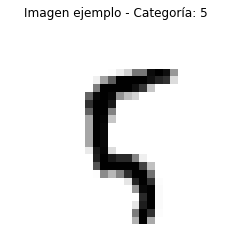

In [5]:
x_train = x_train/255.0
x_test = x_test/255.0
nclases = 10
y_train = np_utils.to_categorical(y_train,nclases)
y_test = np_utils.to_categorical(y_test,nclases)
nimagen = 100
plt.imshow(x_train[nimagen,:].reshape(28,28), cmap='gray_r')
plt.title('Imagen ejemplo - Categoría: ' + str(np.argmax(y_train[nimagen])))
plt.axis('off')
plt.show()

In [6]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [7]:
modelo = Sequential()
# CONV1 Y MAX-POOLING1
modelo.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))
# Aplanar, FC1, FC2 y salida
modelo.add(Flatten())
modelo.add(Dense(120,activation='relu'))
modelo.add(Dense(84,activation='relu'))
modelo.add(Dense(nclases,activation='softmax'))
sgd = SGD(lr=0.1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [9]:
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
nepochs = 10
tam_lote = 128
modelo.fit(x_train,y_train,epochs=nepochs,batch_size=tam_lote, verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 22s 45ms/step - loss: 0.3658 - accuracy: 0.8854 - val_loss: 0.1215 - val_accuracy: 0.9624
Epoch 2/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0942 - accuracy: 0.9708 - val_loss: 0.0714 - val_accuracy: 0.9769
Epoch 3/10
469/469 [==============================] - 21s 46ms/step - loss: 0.0701 - accuracy: 0.9779 - val_loss: 0.0554 - val_accuracy: 0.9822
Epoch 4/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0537 - accuracy: 0.9828 - val_loss: 0.0491 - val_accuracy: 0.9837
Epoch 5/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0458 - accuracy: 0.9855 - val_loss: 0.0447 - val_accuracy: 0.9842
Epoch 6/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0407 - accuracy: 0.9869 - val_loss: 0.0395 - val_accuracy: 0.9859
Epoch 7/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0349 - accuracy: 0.9890 - val_loss: 0.0431 - val_accuracy:

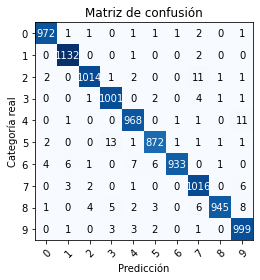

In [17]:

y_pred = np.argmax(modelo.predict(x_test), axis=1)
y_ref = np.argmax(y_test,axis=1)
etiquetas = ['0','1','2','3','4','5','6','7','8','9']
graficar_matriz_de_confusion(y_ref, y_pred, etiquetas)